<a href="https://colab.research.google.com/github/khushi557/fsd/blob/main/Khushi%20Kathak_136.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


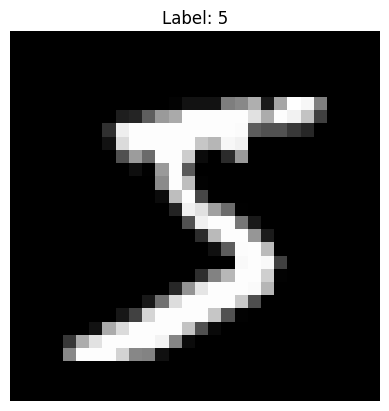

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8772 - loss: 0.4314 - val_accuracy: 0.9581 - val_loss: 0.1386
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9645 - loss: 0.1170 - val_accuracy: 0.9699 - val_loss: 0.0999
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9755 - loss: 0.0815 - val_accuracy: 0.9729 - val_loss: 0.0894
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9817 - loss: 0.0592 - val_accuracy: 0.9768 - val_loss: 0.0772
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9868 - loss: 0.0442 - val_accuracy: 0.9775 - val_loss: 0.0698
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0782
Test Accuracy: 0.9775000214576721
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


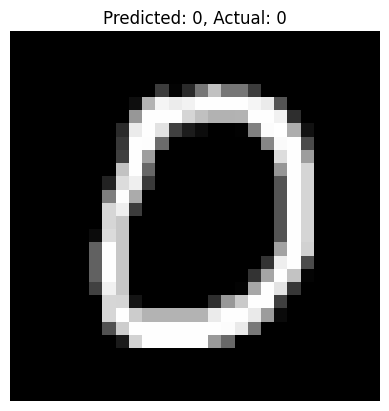

In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train = x_train / 255.0
x_test = x_test / 255.0


print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

predictions = model.predict(x_test)


index = 10
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {predictions[index].argmax()}, Actual: {y_test[index]}")
plt.axis('off')
plt.show()
